# Imitation of statistics for an article

In this notebook, we reproduce the main statistics of the following article : https://doi.org/10.1158/1078-0432.CCR-20-1163 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading the dataset and preprocessing

### Reading

The dataset of this article used in this notebook is the ```Supplemental-table1.xlsx``` file.

In [2]:
df = pd.read_excel('data/Supplemental-table1.xlsx')
df

,Anonymous ID,EGA ID,Tumour type,Sex,Line of therapy,Immunotherapy regimen,Cohort,Reason for discontinuation,Best response,Age at advanced disease diagnosis,...,Alive_0,Time to progression (days),Progression_1,Clinical benefit,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Lymph related
0,14891,EGAD00001001961,LUNG,F,8,Nivolumab,Naive,Progression,Mixed,45,...,1,179,1,NCB,0.351869,11.095310,23.0729,4.1689,55.51575,Non-lymph related
1,18624,EGAD00001002047,AECA,F,10,Nivolumab,Naive,Progression,Stable disease,47,...,1,148,1,NCB,0.071464,3.876336,5.4552,0.7910,9.32352,Non-lymph related
2,21392,EGAD00001002544,OV,F,6,Monalizumab,Naive,Progression,Physician assessed SD,57,...,1,79,1,NCB,0.040394,2.415688,4.1274,4.0377,50.12008,Lymph related
3,21516,EGAD00001002546,SKCM,F,3,Ipilimumab,Naive,Death,Not evaluable,29,...,1,11,0,NCB,0.052774,6.235845,11.4871,0.6006,1.58550,Non-lymph related
4,22186,EGAD00001001966,LUNG,F,4,Atezolizumab,Naive,Progression,Stable disease,52,...,1,80,1,NCB,0.009323,4.606660,7.1503,1.8234,38.42695,Non-lymph related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,39344,EGAD00001005839,UVM,F,1,Pembrolizumab,Treated,Ongoing,Physician assessed SD,64,...,0,232,1,DCB,0.011178,1.516827,1.5457,0.4231,12.48693,Non-lymph related
94,37899,EGAD00001005838,CHOL,F,2,Nivolumab,Naive,Death,Physician assessed PR,38,...,1,96,0,NCB,0.818233,2.247151,2.7416,11.2704,47.97376,Non-lymph related
95,37775,EGAD00001004934,HNSC,M,1,Avelumab/OX40 agonist PF-04518600,Naive,Progression,Stable disease,69,...,1,69,1,NCB,0.018982,3.848247,5.8036,8.7136,5.13403,Non-lymph related
96,38313,EGAD00001005844,ACC,F,3,Avelumab/Debio1143 (SMAC mimetic),Naive,Toxicity,Partial response,34,...,1,51,1,NCB,0.000000,5.617878,7.7940,0.0688,0.51364,Non-lymph related


### Delete non-naive patients
In the article, the authors only focus on naive patients, so we drop the non-naive patients.

In [3]:
df = df[df["Cohort"] == 'Naive']
df

,Anonymous ID,EGA ID,Tumour type,Sex,Line of therapy,Immunotherapy regimen,Cohort,Reason for discontinuation,Best response,Age at advanced disease diagnosis,...,Alive_0,Time to progression (days),Progression_1,Clinical benefit,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Lymph related
0,14891,EGAD00001001961,LUNG,F,8,Nivolumab,Naive,Progression,Mixed,45,...,1,179,1,NCB,0.351869,11.095310,23.0729,4.1689,55.51575,Non-lymph related
1,18624,EGAD00001002047,AECA,F,10,Nivolumab,Naive,Progression,Stable disease,47,...,1,148,1,NCB,0.071464,3.876336,5.4552,0.7910,9.32352,Non-lymph related
2,21392,EGAD00001002544,OV,F,6,Monalizumab,Naive,Progression,Physician assessed SD,57,...,1,79,1,NCB,0.040394,2.415688,4.1274,4.0377,50.12008,Lymph related
3,21516,EGAD00001002546,SKCM,F,3,Ipilimumab,Naive,Death,Not evaluable,29,...,1,11,0,NCB,0.052774,6.235845,11.4871,0.6006,1.58550,Non-lymph related
4,22186,EGAD00001001966,LUNG,F,4,Atezolizumab,Naive,Progression,Stable disease,52,...,1,80,1,NCB,0.009323,4.606660,7.1503,1.8234,38.42695,Non-lymph related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,39280,EGAD00001004933,LUNG,M,2,Pembrolizumab,Naive,Toxicity,Physician Assessed SD,60,...,1,401,0,DCB,0.695396,84.998501,96.4079,8.4768,86.62561,Non-lymph related
94,37899,EGAD00001005838,CHOL,F,2,Nivolumab,Naive,Death,Physician assessed PR,38,...,1,96,0,NCB,0.818233,2.247151,2.7416,11.2704,47.97376,Non-lymph related
95,37775,EGAD00001004934,HNSC,M,1,Avelumab/OX40 agonist PF-04518600,Naive,Progression,Stable disease,69,...,1,69,1,NCB,0.018982,3.848247,5.8036,8.7136,5.13403,Non-lymph related
96,38313,EGAD00001005844,ACC,F,3,Avelumab/Debio1143 (SMAC mimetic),Naive,Toxicity,Partial response,34,...,1,51,1,NCB,0.000000,5.617878,7.7940,0.0688,0.51364,Non-lymph related


### Select pertinent columns
For this notebook and the statistics, we need the following columns :
- The scores of the biomarkers : ```CD8+ T cell score```, ```Exome mut per mb```, ```Genome mut per mb```, ```CD274 expression```, and ```M1M2 expression```.
- The columns which indicates if the patient had a response or not : ```Clinical benefit```.
- The survival measures : ```Overall survival (days)``` and ```Time to progression (days)```.
- The event status (for surviving) : ```Alive_0``` and ```Progression_1```.

So let's select them.

In [4]:
df = df.loc[:,["CD8+ T cell score","Exome mut per mb","Genome mut per mb","CD274 expression","M1M2 expression","Clinical benefit","Overall survival (days)","Time to progression (days)","Alive_0","Progression_1"]]
df

,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
0,0.351869,11.095310,23.0729,4.1689,55.51575,NCB,391,179,1,1
1,0.071464,3.876336,5.4552,0.7910,9.32352,NCB,544,148,1,1
2,0.040394,2.415688,4.1274,4.0377,50.12008,NCB,408,79,1,1
3,0.052774,6.235845,11.4871,0.6006,1.58550,NCB,11,11,1,0
4,0.009323,4.606660,7.1503,1.8234,38.42695,NCB,385,80,1,1
...,...,...,...,...,...,...,...,...,...,...
92,0.695396,84.998501,96.4079,8.4768,86.62561,DCB,401,401,1,0
94,0.818233,2.247151,2.7416,11.2704,47.97376,NCB,96,96,1,0
95,0.018982,3.848247,5.8036,8.7136,5.13403,NCB,441,69,1,1
96,0.000000,5.617878,7.7940,0.0688,0.51364,NCB,158,51,1,1


## 1. Distribution study of biomarkers for DCB group and NCB group

In this section, we study, for each biomarker of this article, the distribution of their values for the group DCB (responders) et NCB (non responders). The results are boxplots.

In [5]:
from survivalAnalysis.BiomarkerDistribution import BiomarkerDistribution

plotter = BiomarkerDistribution()

### Splitting the dataframe into DCB group and NCB group

In [6]:
dcb_group = df.loc[df["Clinical benefit"] == "DCB"]
ncb_group = df.loc[df["Clinical benefit"] == "NCB"]
display(dcb_group)
display(ncb_group)

,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
10,0.202788,80.953628,107.1840,1.7444,19.27326,DCB,184,184,0,0
12,0.262311,1.404470,2.7140,3.1427,467.93886,DCB,309,222,1,1
13,0.060953,17.612049,33.6950,0.2410,5.25660,DCB,578,578,0,0
17,0.680930,0.926950,1.3296,27.3710,98.38025,DCB,756,756,0,0
19,0.139384,16.348026,16.0194,25.7392,23.19457,DCB,462,204,1,1
23,0.173110,1.095486,1.0423,1.1816,14.09756,DCB,699,557,0,1
24,0.126651,6.853812,9.3941,3.0892,36.90372,DCB,1100,214,1,1
25,0.054904,12.724495,23.2112,1.1874,7.55635,DCB,444,188,1,1
27,0.012850,2.668492,4.4817,0.8840,3.77268,DCB,407,290,1,1
39,0.010180,23.875983,40.1297,0.3657,1.39105,DCB,714,535,0,1


,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
0,0.351869,11.095310,23.0729,4.1689,55.51575,NCB,391,179,1,1
1,0.071464,3.876336,5.4552,0.7910,9.32352,NCB,544,148,1,1
2,0.040394,2.415688,4.1274,4.0377,50.12008,NCB,408,79,1,1
3,0.052774,6.235845,11.4871,0.6006,1.58550,NCB,11,11,1,0
4,0.009323,4.606660,7.1503,1.8234,38.42695,NCB,385,80,1,1
...,...,...,...,...,...,...,...,...,...,...
89,0.008531,19.887290,29.7956,0.8520,3.56523,NCB,467,141,1,1
94,0.818233,2.247151,2.7416,11.2704,47.97376,NCB,96,96,1,0
95,0.018982,3.848247,5.8036,8.7136,5.13403,NCB,441,69,1,1
96,0.000000,5.617878,7.7940,0.0688,0.51364,NCB,158,51,1,1


### TMB biomarker

#### Exome analysis

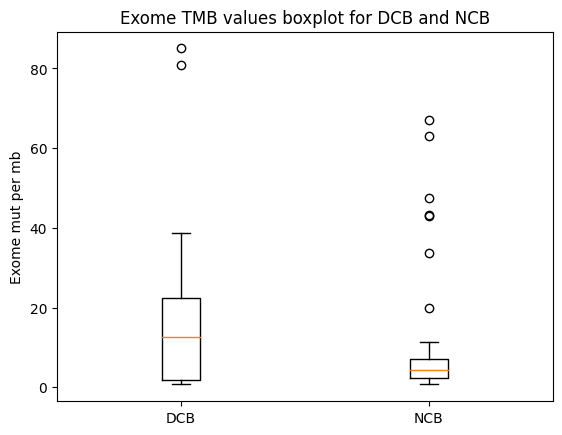

In [7]:
plotter.boxplot_values(dcb_group["Exome mut per mb"], ncb_group["Exome mut per mb"],"DCB","NCB","Exome mut per mb","Exome TMB values boxplot for DCB and NCB","figures/boxplot-tmb-exome.png")

#### Genome analysis

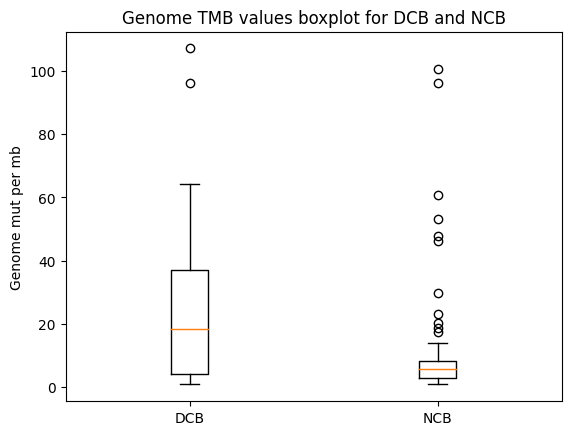

In [8]:
plotter.boxplot_values(dcb_group["Genome mut per mb"], ncb_group["Genome mut per mb"],"DCB","NCB","Genome mut per mb","Genome TMB values boxplot for DCB and NCB","figures/boxplot-tmb-genome.png")

### CD8+ T cell score

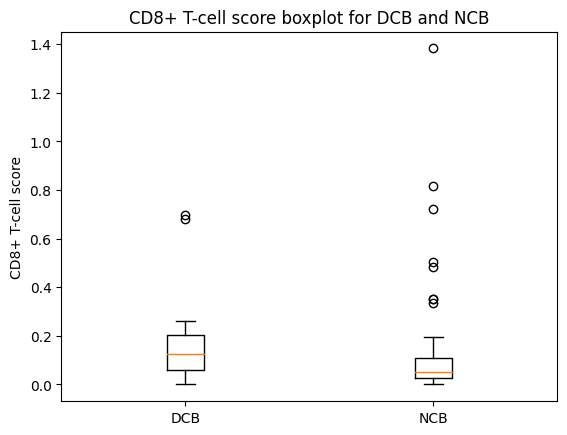

In [9]:
plotter.boxplot_values(dcb_group["CD8+ T cell score"], ncb_group["CD8+ T cell score"],"DCB","NCB","CD8+ T-cell score","CD8+ T-cell score boxplot for DCB and NCB","figures/boxplot-cd8score.png")

### M1-M2 macrophage score

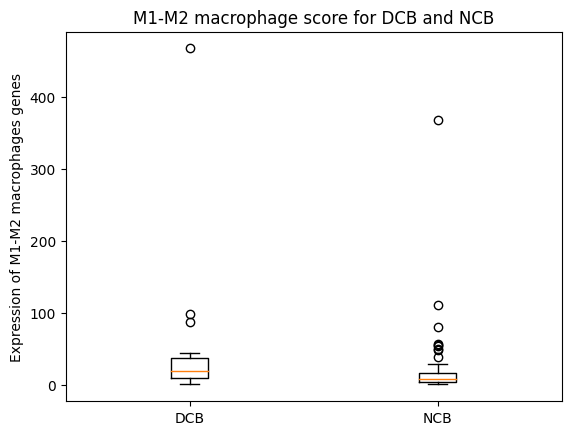

In [10]:
plotter.boxplot_values(dcb_group["M1M2 expression"], ncb_group["M1M2 expression"],"DCB","NCB","Expression of M1-M2 macrophages genes","M1-M2 macrophage score for DCB and NCB","figures/boxplot-m1m2score.png")

### CD274 expression score

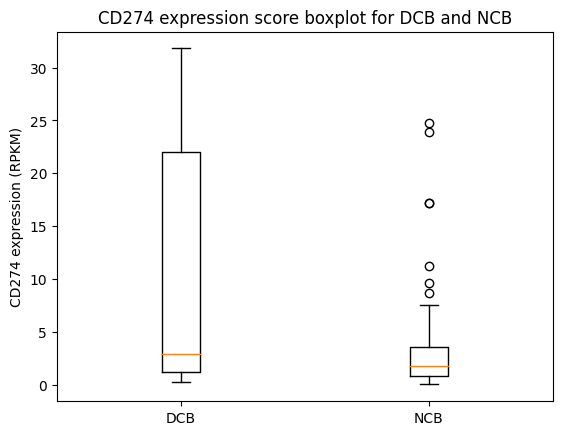

In [11]:
plotter.boxplot_values(dcb_group["CD274 expression"], ncb_group["CD274 expression"],"DCB","NCB","CD274 expression (RPKM)","CD274 expression score boxplot for DCB and NCB","figures/boxplot-cd274score.png")

## 2. Time To Progression (TTP) and Overall Survival (OS) curves
To estimate these curves, we use the Kaplan-Meier estimator. For each biomarker, we split the dataframe in 2 groups : people with high values of the biomarker, and people with low values of the biomarker.

In [12]:
from survivalAnalysis.KaplanMeier import KaplanMeier

km_estimator = KaplanMeier()

### Define the split function
We define the split function we will use for each biomarker.

In [13]:
def split_by_threshold(df: pd.DataFrame, column_name: str, threshold:float) -> tuple[pd.DataFrame, pd.DataFrame]:
    """ 
    Split the given dataframe into 2 groups depending on the value of column_name : under the threshold (low) and over the threshold (high).

    ### Parameters :
    - df : the given dataframe to split into 2 groups depending on the value of column_name.
    - column_name : the name of the column used to split
    - threshold : the threshold.

    ### Returns :
    The 2 groups, under the threshold and over the threshold.
    """
    low_group, high_group = df.loc[df[column_name]<threshold], df.loc[df[column_name]>=threshold]
    return low_group, high_group

### TMB

#### Exome analysis

In [25]:
# Splitting
low_exome_tmb, high_exome_tmb = split_by_threshold(df, "Exome mut per mb", 10)
display(low_exome_tmb)
display(high_exome_tmb)

,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
1,0.071464,3.876336,5.4552,0.7910,9.32352,NCB,544,148,1,1
2,0.040394,2.415688,4.1274,4.0377,50.12008,NCB,408,79,1,1
3,0.052774,6.235845,11.4871,0.6006,1.58550,NCB,11,11,1,0
4,0.009323,4.606660,7.1503,1.8234,38.42695,NCB,385,80,1,1
6,0.351194,1.432559,2.0742,9.6682,110.18996,NCB,160,130,1,1
...,...,...,...,...,...,...,...,...,...,...
85,0.001052,2.219062,2.6721,3.4181,1.79181,NCB,13,13,1,0
86,0.128224,1.825810,2.5119,3.6020,15.86816,NCB,529,82,1,1
94,0.818233,2.247151,2.7416,11.2704,47.97376,NCB,96,96,1,0
95,0.018982,3.848247,5.8036,8.7136,5.13403,NCB,441,69,1,1


<function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>

##### TTP

In [16]:
# Formatting the data for the Kaplan Meier estimator
km_low_exome_tmb_ttp = np.array(list((low_exome_tmb[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])
km_high_exome_tmb_ttp = np.array(list((high_exome_tmb[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])

# Estimating the TTP curves
time_low_exome_tmb_ttp, ttp_low_exome_tmb = km_estimator.estimate_survival_function(km_low_exome_tmb_ttp['Progression_1'],km_low_exome_tmb_ttp['Time to progression (days)'])
time_high_exome_tmb_ttp, ttp_high_exome_tmb = km_estimator.estimate_survival_function(km_high_exome_tmb_ttp['Progression_1'],km_high_exome_tmb_ttp['Time to progression (days)'])

##### OS

In [18]:
# Formatting the data for the Kaplan Meier estimator
km_low_exome_tmb_os = np.array(list((low_exome_tmb[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])
km_high_exome_tmb_os = np.array(list((high_exome_tmb[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])

# Estimating the TTP curves
time_low_exome_tmb_os, os_low_exome_tmb = km_estimator.estimate_survival_function(km_low_exome_tmb_os['Alive_0'],km_low_exome_tmb_os['Overall survival (days)'])
time_high_exome_tmb_os, os_high_exome_tmb = km_estimator.estimate_survival_function(km_high_exome_tmb_os['Alive_0'],km_high_exome_tmb_os['Overall survival (days)'])

##### Plot the result

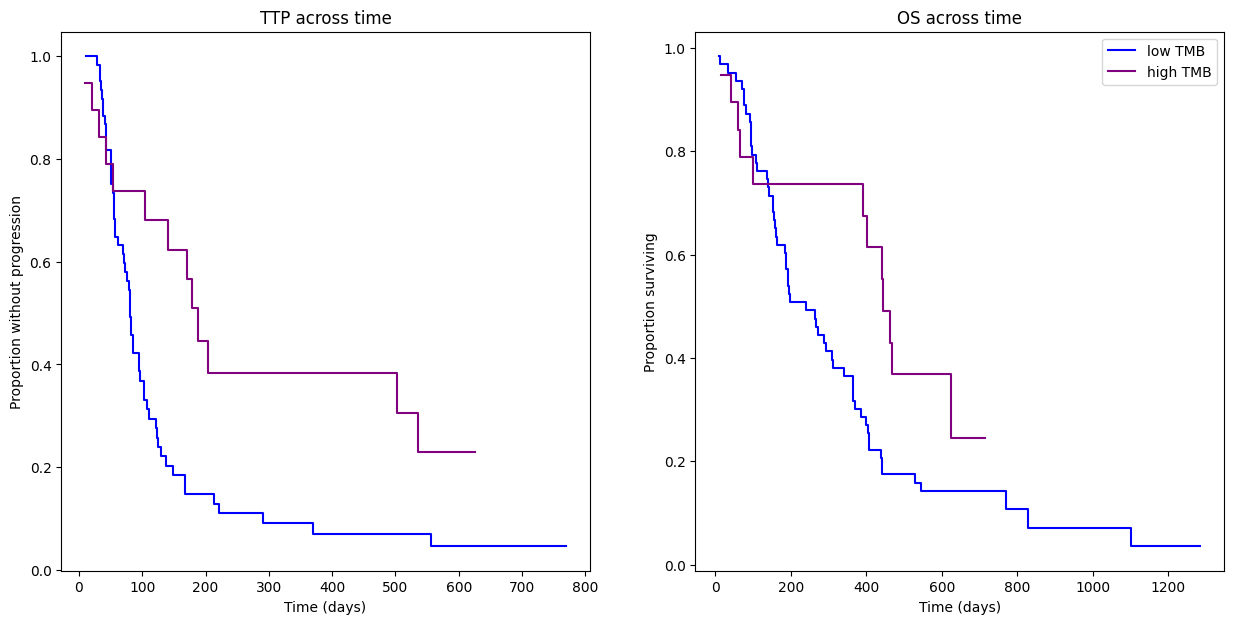

In [24]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

# TTP : 
ax[0].step(time_low_exome_tmb_ttp, ttp_low_exome_tmb, where='post',color='blue',label='low TMB')
ax[0].step(time_high_exome_tmb_ttp, ttp_high_exome_tmb, where='post',color='purple',label='high TMB')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Proportion without progression')
ax[0].set_title('TTP across time (exome)')

# OS : 
ax[1].step(time_low_exome_tmb_os, os_low_exome_tmb, where='post',color='blue',label='low TMB')
ax[1].step(time_high_exome_tmb_os, os_high_exome_tmb, where='post',color='purple',label='high TMB')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Proportion surviving')
ax[1].set_title('OS across time (exome)')

plt.legend()
plt.savefig('figures/survival-exome-tmb.png')

#### Genome analysis

In [26]:
# Splitting
low_genome_tmb, high_genome_tmb = split_by_threshold(df, "Genome mut per mb", 10)
display(low_genome_tmb)
display(high_genome_tmb)

,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
1,0.071464,3.876336,5.455200,0.7910,9.32352,NCB,544,148,1,1
2,0.040394,2.415688,4.127400,4.0377,50.12008,NCB,408,79,1,1
4,0.009323,4.606660,7.150300,1.8234,38.42695,NCB,385,80,1,1
6,0.351194,1.432559,2.074200,9.6682,110.18996,NCB,160,130,1,1
9,0.038359,5.477431,3.135000,0.4835,6.76743,NCB,70,70,1,0
11,0.000000,5.617878,7.047600,0.9796,7.78044,NCB,111,73,1,1
12,0.262311,1.404470,2.714000,3.1427,467.93886,DCB,309,222,1,1
14,0.001192,1.207844,2.053900,0.3580,0.84480,NCB,313,81,1,1
15,0.034957,3.454995,4.353200,0.9012,2.06238,NCB,154,38,1,1
16,0.085451,2.724671,4.322500,2.3061,10.39606,NCB,155,41,1,1


,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
0,0.351869,11.095310,23.0729,4.1689,55.51575,NCB,391,179,1,1
3,0.052774,6.235845,11.4871,0.6006,1.58550,NCB,11,11,1,0
10,0.202788,80.953628,107.1840,1.7444,19.27326,DCB,184,184,0,0
13,0.060953,17.612049,33.6950,0.2410,5.25660,DCB,578,578,0,0
19,0.139384,16.348026,16.0194,25.7392,23.19457,DCB,462,204,1,1
25,0.054904,12.724495,23.2112,1.1874,7.55635,DCB,444,188,1,1
28,0.011377,11.179578,18.6991,3.1240,2.04469,NCB,101,32,1,1
39,0.010180,23.875983,40.1297,0.3657,1.39105,DCB,714,535,0,1
40,0.001527,22.387246,37.0188,2.9120,9.01973,DCB,623,503,1,1
43,0.043570,9.887466,17.4565,6.9208,53.73068,NCB,192,95,1,1


##### TTP

In [27]:
# Formatting the data for the Kaplan Meier estimator
km_low_genome_tmb_ttp = np.array(list((low_genome_tmb[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])
km_high_genome_tmb_ttp = np.array(list((high_genome_tmb[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])

# Estimating the TTP curves
time_low_genome_tmb_ttp, ttp_low_genome_tmb = km_estimator.estimate_survival_function(km_low_genome_tmb_ttp['Progression_1'],km_low_genome_tmb_ttp['Time to progression (days)'])
time_high_genome_tmb_ttp, ttp_high_genome_tmb = km_estimator.estimate_survival_function(km_high_genome_tmb_ttp['Progression_1'],km_high_genome_tmb_ttp['Time to progression (days)'])

##### OS

In [28]:
# Formatting the data for the Kaplan Meier estimator
km_low_genome_tmb_os = np.array(list((low_genome_tmb[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])
km_high_genome_tmb_os = np.array(list((high_genome_tmb[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])

# Estimating the TTP curves
time_low_genome_tmb_os, os_low_genome_tmb = km_estimator.estimate_survival_function(km_low_genome_tmb_os['Alive_0'],km_low_genome_tmb_os['Overall survival (days)'])
time_high_genome_tmb_os, os_high_genome_tmb = km_estimator.estimate_survival_function(km_high_genome_tmb_os['Alive_0'],km_high_genome_tmb_os['Overall survival (days)'])

##### Plot the result

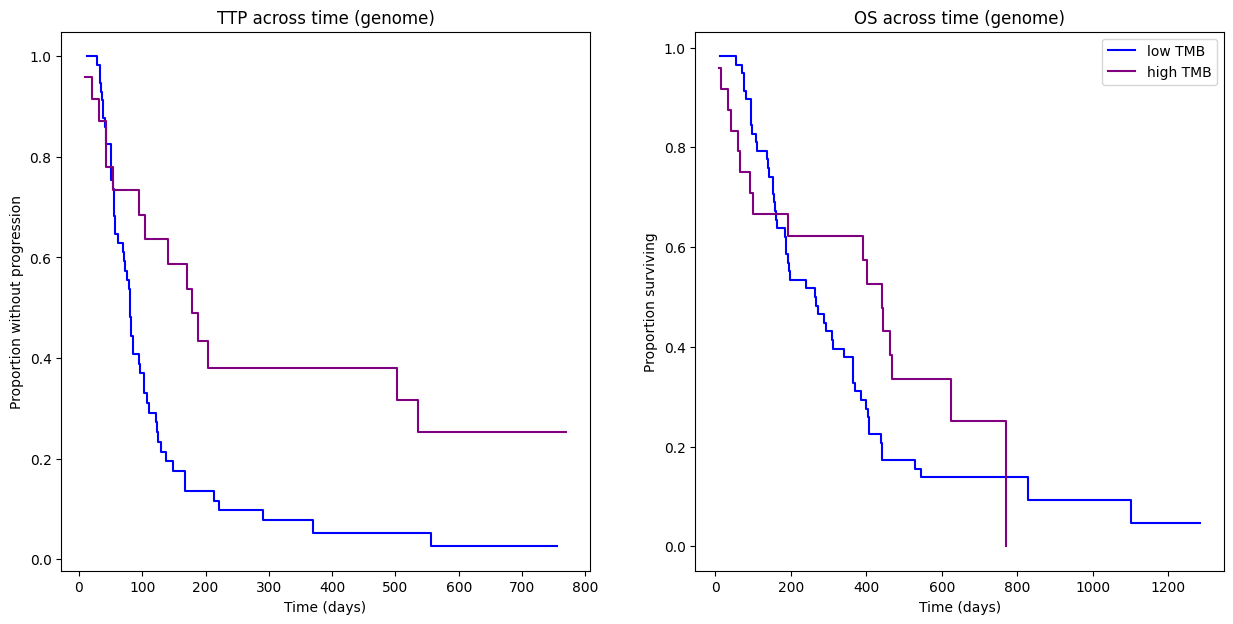

In [29]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

# TTP : 
ax[0].step(time_low_genome_tmb_ttp, ttp_low_genome_tmb, where='post',color='blue',label='low TMB')
ax[0].step(time_high_genome_tmb_ttp, ttp_high_genome_tmb, where='post',color='purple',label='high TMB')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Proportion without progression')
ax[0].set_title('TTP across time (genome)')

# OS : 
ax[1].step(time_low_genome_tmb_os, os_low_genome_tmb, where='post',color='blue',label='low TMB')
ax[1].step(time_high_genome_tmb_os, os_high_genome_tmb, where='post',color='purple',label='high TMB')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Proportion surviving')
ax[1].set_title('OS across time (genome)')

plt.legend()
plt.savefig('figures/survival-genome-tmb.png')

### CD8+ T-cell score

In [30]:
# Splitting
low_cd8, high_cd8 = split_by_threshold(df, "CD8+ T cell score", 0.054)
display(low_cd8)
display(high_cd8)

,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
2,0.040394,2.415688,4.1274,4.0377,50.12008,NCB,408,79,1,1
3,0.052774,6.235845,11.4871,0.6006,1.58550,NCB,11,11,1,0
4,0.009323,4.606660,7.1503,1.8234,38.42695,NCB,385,80,1,1
9,0.038359,5.477431,3.1350,0.4835,6.76743,NCB,70,70,1,0
11,0.000000,5.617878,7.0476,0.9796,7.78044,NCB,111,73,1,1
14,0.001192,1.207844,2.0539,0.3580,0.84480,NCB,313,81,1,1
15,0.034957,3.454995,4.3532,0.9012,2.06238,NCB,154,38,1,1
18,0.042943,6.488650,6.8009,1.5394,6.75839,NCB,139,125,1,1
21,0.016645,3.202191,5.2737,0.1595,1.29605,NCB,197,102,1,1
27,0.012850,2.668492,4.4817,0.8840,3.77268,DCB,407,290,1,1


,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
0,0.351869,11.095310,23.072900,4.1689,55.51575,NCB,391,179,1,1
1,0.071464,3.876336,5.455200,0.7910,9.32352,NCB,544,148,1,1
6,0.351194,1.432559,2.074200,9.6682,110.18996,NCB,160,130,1,1
10,0.202788,80.953628,107.184000,1.7444,19.27326,DCB,184,184,0,0
12,0.262311,1.404470,2.714000,3.1427,467.93886,DCB,309,222,1,1
13,0.060953,17.612049,33.695000,0.2410,5.25660,DCB,578,578,0,0
16,0.085451,2.724671,4.322500,2.3061,10.39606,NCB,155,41,1,1
17,0.680930,0.926950,1.329600,27.3710,98.38025,DCB,756,756,0,0
19,0.139384,16.348026,16.019400,25.7392,23.19457,DCB,462,204,1,1
20,0.483515,1.376380,1.456300,17.1535,80.26835,NCB,442,102,1,1


#### TTP

In [33]:
# Formatting the data for the Kaplan Meier estimator
km_low_cd8_ttp = np.array(list((low_cd8[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])
km_high_cd8_ttp = np.array(list((high_cd8[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])

# Estimating the TTP curves
time_low_cd8_ttp, ttp_low_cd8 = km_estimator.estimate_survival_function(km_low_cd8_ttp['Progression_1'],km_low_cd8_ttp['Time to progression (days)'])
time_high_cd8_ttp, ttp_high_cd8 = km_estimator.estimate_survival_function(km_high_cd8_ttp['Progression_1'],km_high_cd8_ttp['Time to progression (days)'])

#### OS

In [34]:
# Formatting the data for the Kaplan Meier estimator
km_low_cd8_os = np.array(list((low_cd8[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])
km_high_cd8_os = np.array(list((high_cd8[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])

# Estimating the OS curves
time_low_cd8_os, os_low_cd8 = km_estimator.estimate_survival_function(km_low_cd8_os['Alive_0'],km_low_cd8_os['Overall survival (days)'])
time_high_cd8_os, os_high_cd8 = km_estimator.estimate_survival_function(km_high_cd8_os['Alive_0'],km_high_cd8_os['Overall survival (days)'])

#### Plot the result

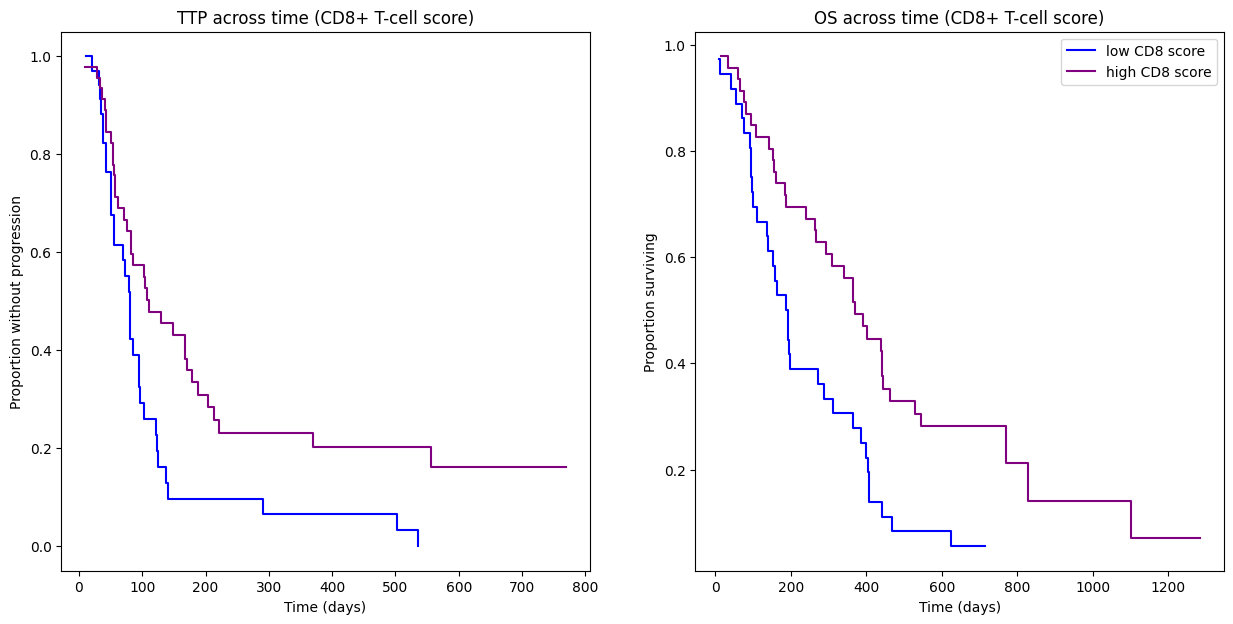

In [38]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

# TTP : 
ax[0].step(time_low_cd8_ttp, ttp_low_cd8, where='post',color='blue',label='low CD8 score')
ax[0].step(time_high_cd8_ttp, ttp_high_cd8, where='post',color='purple',label='high CD8 score')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Proportion without progression')
ax[0].set_title('TTP across time (CD8+ T-cell score)')

# OS : 
ax[1].step(time_low_cd8_os, os_low_cd8, where='post',color='blue',label='low CD8 score')
ax[1].step(time_high_cd8_os, os_high_cd8, where='post',color='purple',label='high CD8 score')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Proportion surviving')
ax[1].set_title('OS across time (CD8+ T-cell score)')

plt.legend()
plt.savefig('figures/survival-cd8.png')

### M1-M2 macrophage score

In [39]:
# Splitting
low_m1m2, high_m1m2 = split_by_threshold(df, "M1M2 expression", 8.51)
display(low_m1m2)
display(high_m1m2)

,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
3,0.052774,6.235845,11.4871,0.6006,1.58550,NCB,11,11,1,0
9,0.038359,5.477431,3.1350,0.4835,6.76743,NCB,70,70,1,0
11,0.000000,5.617878,7.0476,0.9796,7.78044,NCB,111,73,1,1
13,0.060953,17.612049,33.6950,0.2410,5.25660,DCB,578,578,0,0
14,0.001192,1.207844,2.0539,0.3580,0.84480,NCB,313,81,1,1
15,0.034957,3.454995,4.3532,0.9012,2.06238,NCB,154,38,1,1
18,0.042943,6.488650,6.8009,1.5394,6.75839,NCB,139,125,1,1
21,0.016645,3.202191,5.2737,0.1595,1.29605,NCB,197,102,1,1
25,0.054904,12.724495,23.2112,1.1874,7.55635,DCB,444,188,1,1
27,0.012850,2.668492,4.4817,0.8840,3.77268,DCB,407,290,1,1


,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
0,0.351869,11.095310,23.072900,4.1689,55.51575,NCB,391,179,1,1
1,0.071464,3.876336,5.455200,0.7910,9.32352,NCB,544,148,1,1
2,0.040394,2.415688,4.127400,4.0377,50.12008,NCB,408,79,1,1
4,0.009323,4.606660,7.150300,1.8234,38.42695,NCB,385,80,1,1
6,0.351194,1.432559,2.074200,9.6682,110.18996,NCB,160,130,1,1
10,0.202788,80.953628,107.184000,1.7444,19.27326,DCB,184,184,0,0
12,0.262311,1.404470,2.714000,3.1427,467.93886,DCB,309,222,1,1
16,0.085451,2.724671,4.322500,2.3061,10.39606,NCB,155,41,1,1
17,0.680930,0.926950,1.329600,27.3710,98.38025,DCB,756,756,0,0
19,0.139384,16.348026,16.019400,25.7392,23.19457,DCB,462,204,1,1


#### TTP

In [40]:
# Formatting the data for the Kaplan Meier estimator
km_low_m1m2_ttp = np.array(list((low_m1m2[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])
km_high_m1m2_ttp = np.array(list((high_m1m2[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])

# Estimating the TTP curves
time_low_m1m2_ttp, ttp_low_m1m2 = km_estimator.estimate_survival_function(km_low_m1m2_ttp['Progression_1'],km_low_m1m2_ttp['Time to progression (days)'])
time_high_m1m2_ttp, ttp_high_m1m2 = km_estimator.estimate_survival_function(km_high_m1m2_ttp['Progression_1'],km_high_m1m2_ttp['Time to progression (days)'])

#### OS

In [41]:
# Formatting the data for the Kaplan Meier estimator
km_low_m1m2_os = np.array(list((low_m1m2[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])
km_high_m1m2_os = np.array(list((high_m1m2[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])

# Estimating the OS curves
time_low_m1m2_os, os_low_m1m2 = km_estimator.estimate_survival_function(km_low_m1m2_os['Alive_0'],km_low_m1m2_os['Overall survival (days)'])
time_high_m1m2_os, os_high_m1m2 = km_estimator.estimate_survival_function(km_high_m1m2_os['Alive_0'],km_high_m1m2_os['Overall survival (days)'])

#### Plot the result

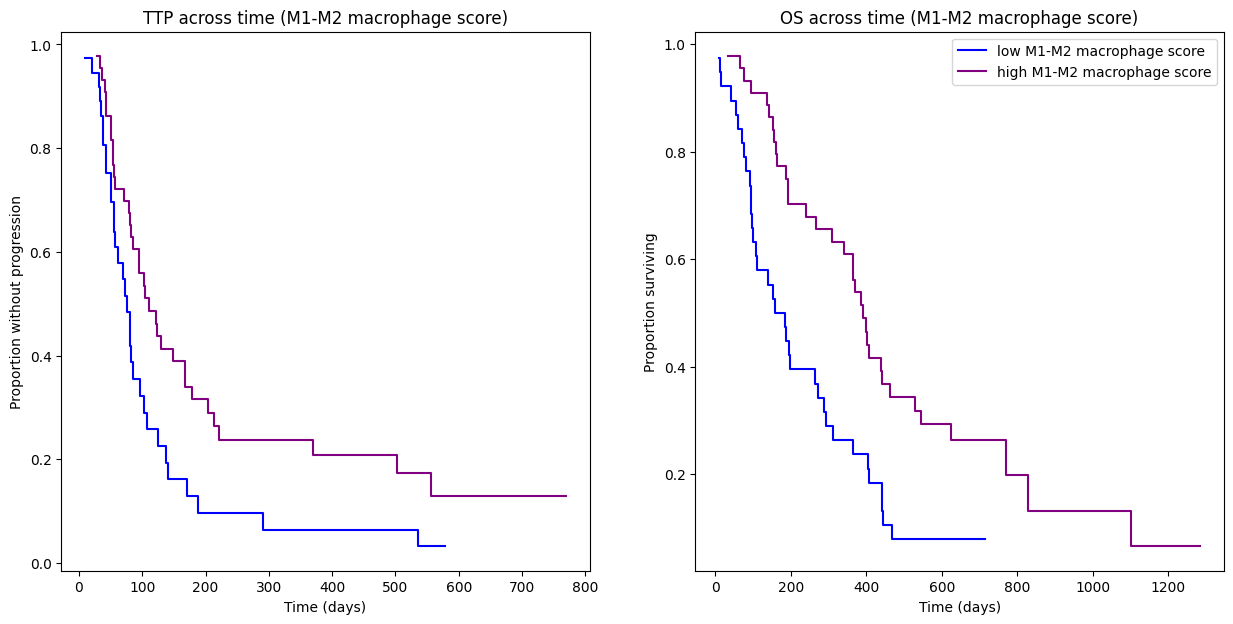

In [43]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

# TTP : 
ax[0].step(time_low_m1m2_ttp, ttp_low_m1m2, where='post',color='blue',label='low M1-M2 macrophage score')
ax[0].step(time_high_m1m2_ttp, ttp_high_m1m2, where='post',color='purple',label='high M1-M2 macrophage score')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Proportion without progression')
ax[0].set_title('TTP across time (M1-M2 macrophage score)')

# OS : 
ax[1].step(time_low_m1m2_os, os_low_m1m2, where='post',color='blue',label='low M1-M2 macrophage score')
ax[1].step(time_high_m1m2_os, os_high_m1m2, where='post',color='purple',label='high M1-M2 macrophage score')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Proportion surviving')
ax[1].set_title('OS across time (M1-M2 macrophage score)')

plt.legend()
plt.savefig('figures/survival-m1m2.png')

### CD274 gene expression

In [44]:
# Splitting
low_cd274, high_cd274 = split_by_threshold(df, "CD274 expression", 4.77)
display(low_cd274)
display(high_cd274)

,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
0,0.351869,11.095310,23.0729,4.1689,55.51575,NCB,391,179,1,1
1,0.071464,3.876336,5.4552,0.7910,9.32352,NCB,544,148,1,1
2,0.040394,2.415688,4.1274,4.0377,50.12008,NCB,408,79,1,1
3,0.052774,6.235845,11.4871,0.6006,1.58550,NCB,11,11,1,0
4,0.009323,4.606660,7.1503,1.8234,38.42695,NCB,385,80,1,1
...,...,...,...,...,...,...,...,...,...,...
85,0.001052,2.219062,2.6721,3.4181,1.79181,NCB,13,13,1,0
86,0.128224,1.825810,2.5119,3.6020,15.86816,NCB,529,82,1,1
88,0.721065,67.161737,100.6487,4.4703,18.01896,NCB,592,53,0,1
89,0.008531,19.887290,29.7956,0.8520,3.56523,NCB,467,141,1,1


,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
6,0.351194,1.432559,2.0742,9.6682,110.18996,NCB,160,130,1,1
17,0.680930,0.926950,1.3296,27.3710,98.38025,DCB,756,756,0,0
19,0.139384,16.348026,16.0194,25.7392,23.19457,DCB,462,204,1,1
20,0.483515,1.376380,1.4563,17.1535,80.26835,NCB,442,102,1,1
26,0.162738,2.640403,3.9165,17.1954,11.07861,NCB,143,29,1,1
41,0.237024,1.264023,4.1110,31.4009,44.31068,DCB,340,340,1,0
43,0.043570,9.887466,17.4565,6.9208,53.73068,NCB,192,95,1,1
53,0.066979,9.297589,18.4017,21.9934,35.96894,DCB,769,769,1,0
57,1.382514,43.032949,47.8654,24.7653,368.92979,NCB,66,43,1,1
58,0.505999,4.859465,5.9303,7.5227,55.99228,NCB,240,167,1,1


#### TTP

In [45]:
# Formatting the data for the Kaplan Meier estimator
km_low_cd274_ttp = np.array(list((low_cd274[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])
km_high_cd274_ttp = np.array(list((high_cd274[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])

# Estimating the TTP curves
time_low_cd274_ttp, ttp_low_cd274 = km_estimator.estimate_survival_function(km_low_cd274_ttp['Progression_1'],km_low_cd274_ttp['Time to progression (days)'])
time_high_cd274_ttp, ttp_high_cd274 = km_estimator.estimate_survival_function(km_high_cd274_ttp['Progression_1'],km_high_cd274_ttp['Time to progression (days)'])

#### OS

In [46]:
# Formatting the data for the Kaplan Meier estimator
km_low_cd274_os = np.array(list((low_cd274[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])
km_high_cd274_os = np.array(list((high_cd274[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])

# Estimating the OS curves
time_low_cd274_os, os_low_cd274 = km_estimator.estimate_survival_function(km_low_cd274_os['Alive_0'],km_low_cd274_os['Overall survival (days)'])
time_high_cd274_os, os_high_cd274 = km_estimator.estimate_survival_function(km_high_cd274_os['Alive_0'],km_high_cd274_os['Overall survival (days)'])

#### Plot the result

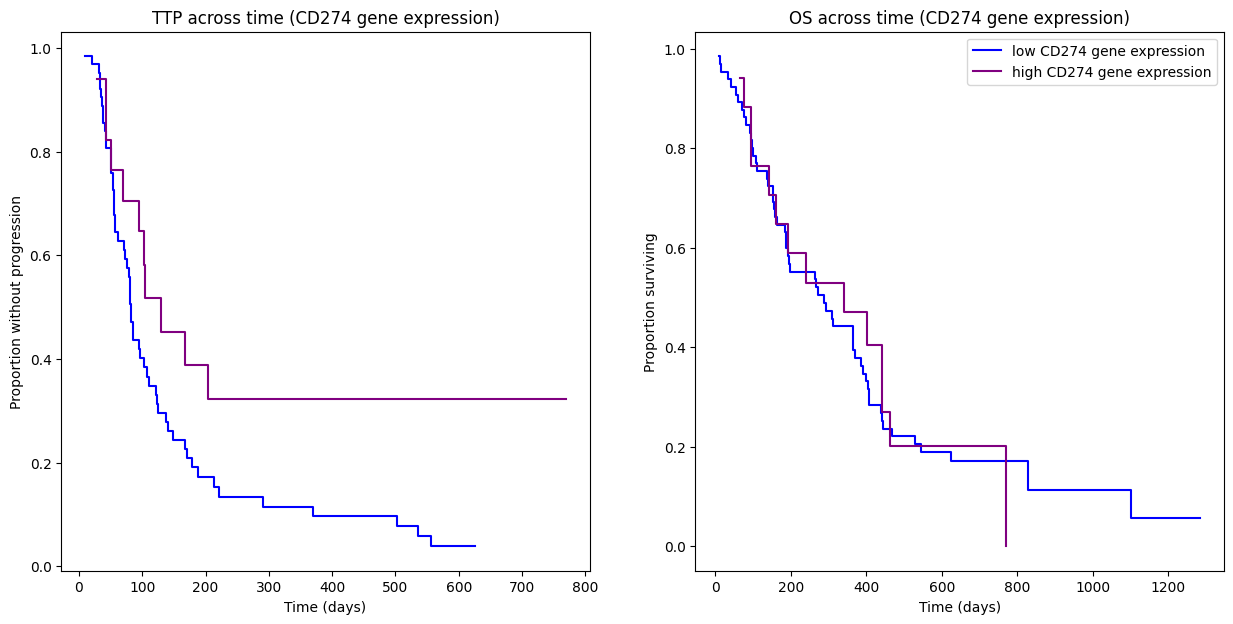

In [47]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

# TTP : 
ax[0].step(time_low_cd274_ttp, ttp_low_cd274, where='post',color='blue',label='low CD274 gene expression')
ax[0].step(time_high_cd274_ttp, ttp_high_cd274, where='post',color='purple',label='high CD274 gene expression')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Proportion without progression')
ax[0].set_title('TTP across time (CD274 gene expression)')

# OS : 
ax[1].step(time_low_cd274_os, os_low_cd274, where='post',color='blue',label='low CD274 gene expression')
ax[1].step(time_high_cd274_os, os_high_cd274, where='post',color='purple',label='high CD274 gene expression')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Proportion surviving')
ax[1].set_title('OS across time (CD274 gene expression)')

plt.legend()
plt.savefig('figures/survival-cd274.png')